In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [71]:

def rossler(t, xyz, a, b, c, Q, N, k, Iext):
    x = xyz[0:100]
    y = xyz[100:200]
    z = xyz[200:300]
    x_mean = np.mean(x)
    dxdt = -y - z + k * (Q* x_mean - x) + Iext
    dydt = x + a * y
    dzdt = b + z * (x - c)
    diff = []
    diff.extend(dxdt)
    diff.extend(dydt)
    diff.extend(dzdt)
    return np.array(diff).flatten()


a = 0.2
b = 0.2
c = 9
N = 100
Iext=0
np.random.seed(7)
x_intial = np.random.rand(N)
y_initial = np.random.rand(N)
z_initial = np.random.rand(N)
initial_vals = []
initial_vals.extend(x_intial)
initial_vals.extend(y_initial)
initial_vals.extend(z_initial)

Q=0.7
k=0.05

t_span = (0, 1000) #start to end
t_eval = np.linspace(*t_span, 100000) #dt=0.001 or 1000 samples/sec


sol = solve_ivp(rossler, t_span, initial_vals, args=(a, b, c,Q,N,k,Iext), t_eval=t_eval,vectorized=True)
print(np.array(sol.y).shape)


(300, 100000)


In [73]:
print(len(initial_vals))
a = initial_vals[0:100]
b = initial_vals[100:200]
c = initial_vals[200:300]
#print(a)
#print(b)
#print(c)

300
[0.07630828937395717, 0.7799187922401146, 0.4384092314408935, 0.7234651778309412, 0.9779895119966027, 0.5384958704104337, 0.5011204636599379, 0.07205113335976154, 0.26843898010187117, 0.49988250082555996, 0.6792299961209405, 0.8037390361043755, 0.3809411331485384, 0.06593634690590511, 0.28814559930799355, 0.9095935277196137, 0.2133853535799155, 0.4521239618176831, 0.9312060196890217, 0.024899227550348013, 0.6005489174641225, 0.9501295004136456, 0.2303028790209648, 0.5484899192360304, 0.9091283748867313, 0.13316944575925016, 0.5234125806737658, 0.7504098591020348, 0.6690132408839138, 0.4677528597449807, 0.20484909029779508, 0.49076588909107044, 0.372384689385059, 0.4774011548515884, 0.36589038578059296, 0.8379179943092606, 0.7686475065195093, 0.31399467721266217, 0.572625332643954, 0.2760490483306951, 0.4528429325464004, 0.3529783659443947, 0.6573994627797582, 0.3703510829880352, 0.45909297789143144, 0.7193241225090415, 0.4129918291138346, 0.9064232691643387, 0.1804516192026816, 0.7

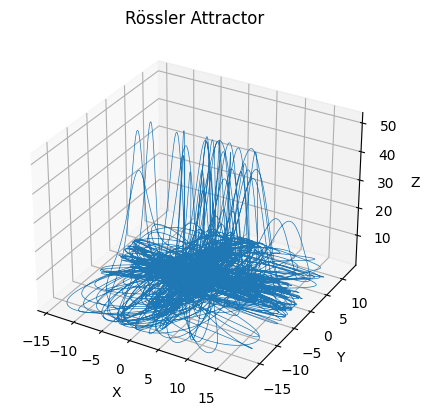

In [74]:
x_solved = np.array(sol.y)[1,:] #(2nd in array,10000 values)
y_solved = np.array(sol.y[100,:]) #(101st in array,10000 values)
z_solved = np.array(sol.y[200,:]) #(201st in array,10000 values)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_solved, y_solved, z_solved, lw=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Rössler Attractor')
plt.show()

(100000,)
(100, 100000)


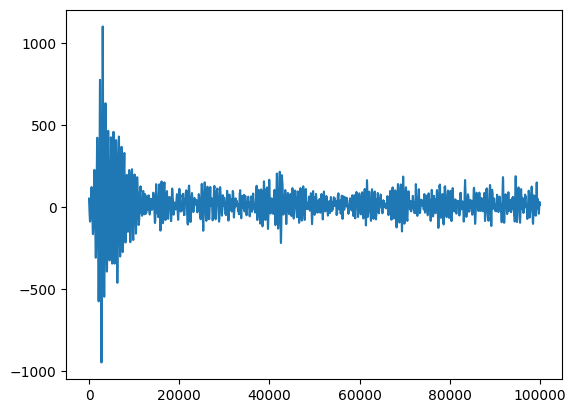

In [84]:
x_vals = sol.y[0:100,:]
mean_x = np.sum(x_vals,axis = 0)
print(mean_x.shape)
print(x_vals.shape)
plt.plot(mean_x)


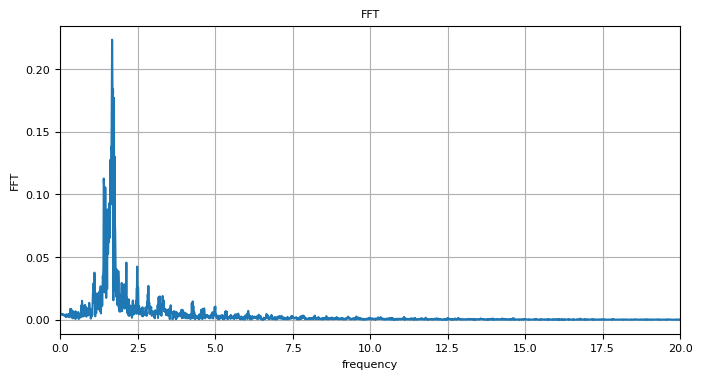

In [76]:
sampling_rate = 1000
fft_output = np.fft.fft(mean_x)
N_fft = len(fft_output)
#print(N_fft)
n = np.arange(N_fft)
T = N_fft/sampling_rate
freq = n/T
#print(fft_output)

plt.figure(figsize = (8,4))
plt.plot(freq, (np.abs(fft_output)/np.linalg.norm(np.abs(fft_output))))
plt.xlim(0,20)
#plt.ylim(0,1)
plt.title('FFT',fontsize="8")
plt.xlabel('frequency',fontsize="8")
plt.ylabel('FFT',fontsize="8")
plt.xticks(fontsize="8")
plt.yticks(fontsize = '8')
plt.grid()

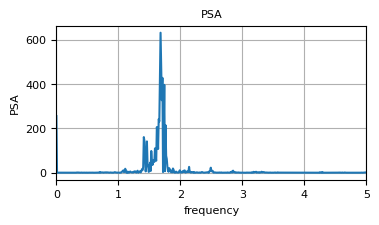

In [65]:
#Power Spectral Analysis
psa=np.square(np.abs(fft_output))/(N_fft*N_fft)
plt.figure(figsize = (4,2))
plt.plot(freq,psa)
plt.xlim(0,5)
plt.title('PSA',fontsize="8")
plt.xlabel('frequency',fontsize="8")
plt.ylabel('PSA',fontsize="8")
plt.xticks(fontsize="8")
plt.yticks(fontsize = '8')
plt.grid()

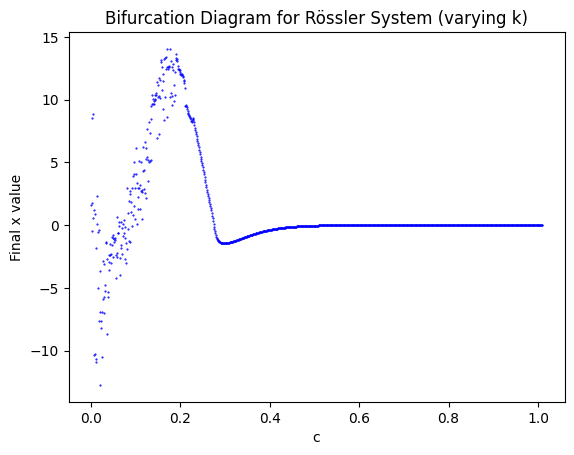

In [68]:

def rossler(t, xyz, a, b, c, Q, N, k):
    x, y, z = xyz
    x_mean = np.mean(x)
    dxdt = -y - z + k * (Q* x_mean - x)
    dydt = x + a * y
    dzdt = b + z * (x - c)
    return [dxdt, dydt, dzdt]

a = 0.2
b = 0.2
c=9
Q=0.5
k_values =np.arange(0,1.01,0.001)
x0 = initial_vals[1]
y0 = initial_vals[100]
z0 =initial_vals[200]

t_span = (0, 100)
t_eval = np.linspace(*t_span, 1000)
bifurcation_data = []

# Iterate over k values
for k in k_values:
    sol = solve_ivp(rossler, t_span, [x0, y0, z0], args=(a, b, c,Q,N,k), t_eval=t_eval)
    bifurcation_data.append(sol.y[0][-1])

plt.plot(k_values, bifurcation_data, 'b.', markersize=1)
plt.xlabel('c')
plt.ylabel('Final x value')
plt.title('Bifurcation Diagram for Rössler System (varying k)')
plt.show()

In [ ]:
def shannon_entropy(probabilities):
    non_zero_probabilities = probabilities[probabilities != 0]
    entropy = -np.sum(non_zero_probabilities * np.log2(non_zero_probabilities))
    return entropy

probabilities = np.array([0.2, 0.9, 0.1, 0.4, 0])
entropy = shannon_entropy(probabilities)

print(entropy)


1.4621524505216983


In [ ]:
z_vals = sol.y[200:300,:]
plt.figure(figsize = (15,3))
plt.plot(z_vals[0])
plt.plot(z_vals[2])
plt.plot(z_vals[3])
plt.plot(z_vals[4])

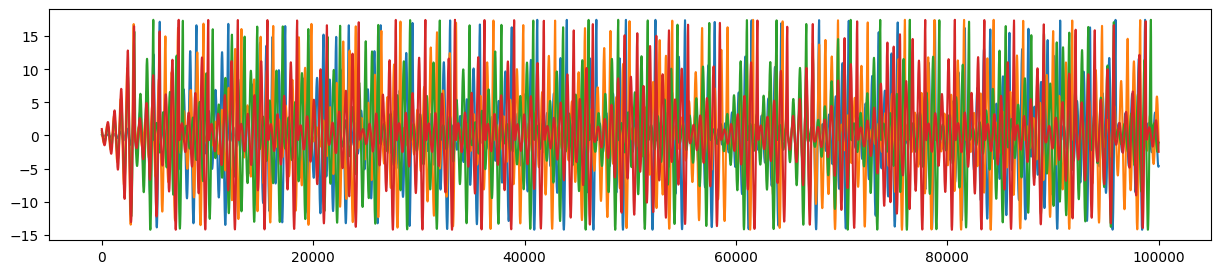

In [85]:
plt.figure(figsize = (15,3))
plt.plot(x_vals[0])
plt.plot(x_vals[2])
plt.plot(x_vals[3])
plt.plot(x_vals[4])